In [32]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')


In [33]:
#displaying data
df=pd.read_csv(r"C:\Users\Swapnali\Desktop\Boston_housing\housing.csv")
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


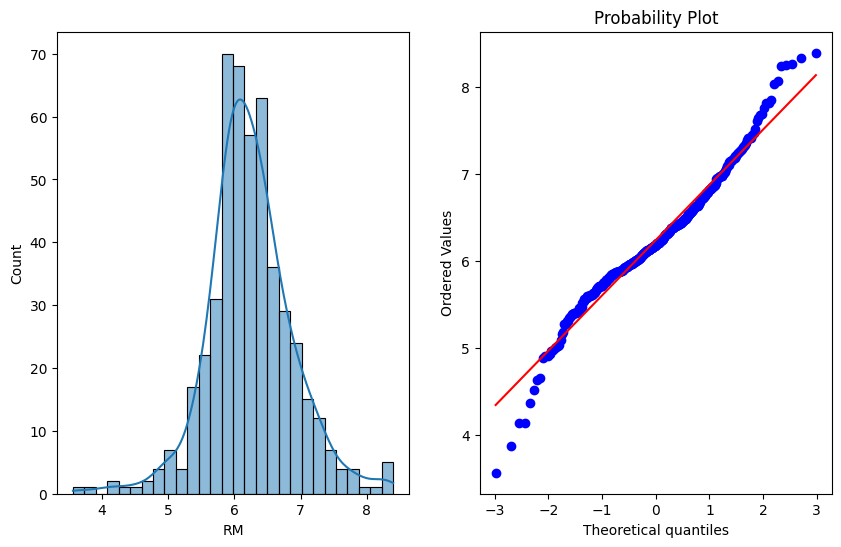

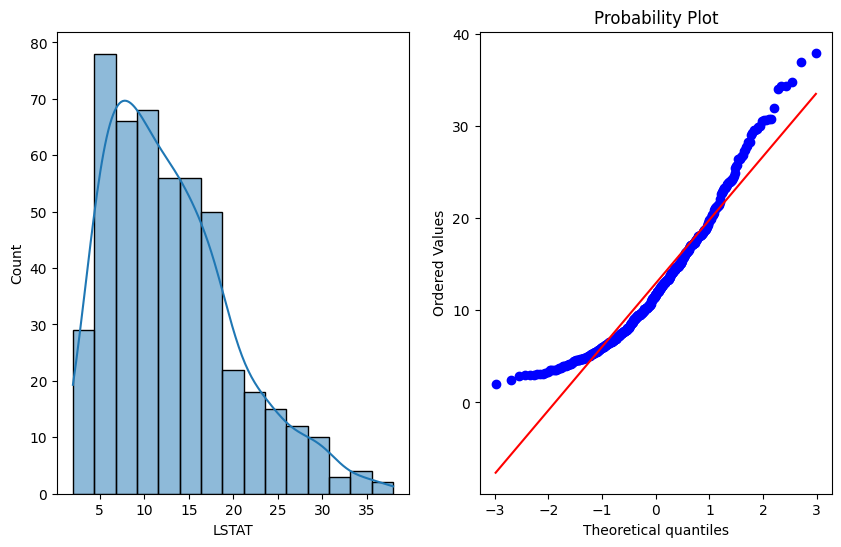

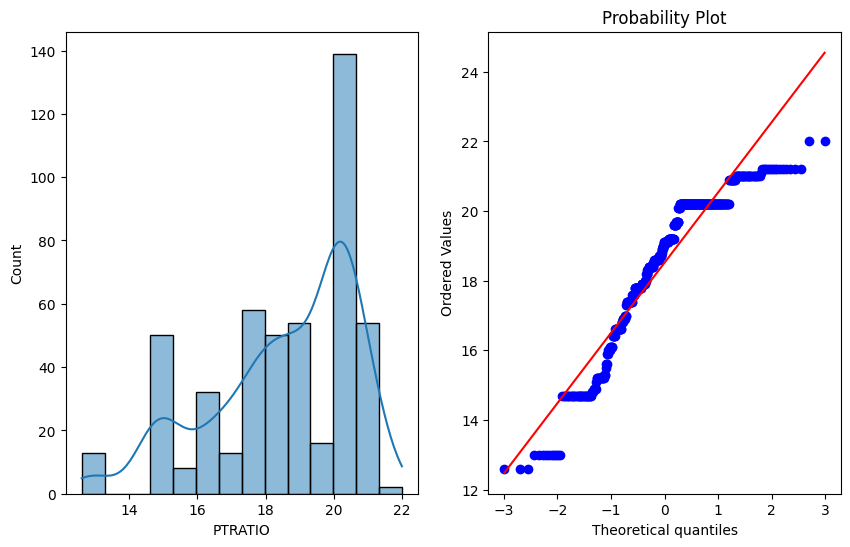

In [34]:
#this code defines a function to visualize the distribution and normality of a given column in a DataFrame using a histogram and a Q-Q plot.
#Then, it loops through all feature columns in the DataFrame (excluding "MEDV") and applies the function to each column to assess their distributions.


def check_dist(df, var):
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df, kde = True)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()
for col in df.drop("MEDV", axis =1).columns:
    check_dist(df, col)

In [35]:
#Train Test Split
X = df.drop(columns ="MEDV") #df[["RM", "LSTAT", "PTRATIO"]]
y = df["MEDV"]
from sklearn.model_selection import train_test_split
#30% test and 70% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [36]:
#This is your training set
X_train

,RM,LSTAT,PTRATIO
400,5.304,26.64,20.2
3,6.998,2.94,18.7
341,5.884,7.79,18.3
446,6.513,10.29,20.2
60,5.741,13.15,19.7
...,...,...,...
106,5.836,18.66,20.9
270,7.820,3.76,14.9
348,6.112,12.67,20.2
435,6.297,17.27,20.2


In [37]:
#This is your testing set 
X_test

,RM,LSTAT,PTRATIO
451,5.926,18.13,20.2
84,6.389,9.62,18.5
434,6.655,17.73,20.2
472,5.414,23.97,20.1
428,6.459,23.98,20.2
...,...,...,...
5,6.430,5.21,18.7
116,6.176,12.04,17.8
45,5.682,10.21,17.9
16,5.935,6.58,21.0


In [38]:
#Compare Actual and predicted Labels
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

In [40]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [41]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
451,401100.0,344506.487591,56593.512409
84,501900.0,506327.279766,-4427.279766
434,319200.0,415353.170170,-96153.170170
472,147000.0,239962.063880,-92962.063880
428,247800.0,333649.613126,-85849.613126
...,...,...,...
5,602700.0,551229.614629,51470.385371
116,445200.0,475562.294919,-30362.294919
45,405300.0,447067.081751,-41767.081751
16,485100.0,447799.381001,37300.618999


In [42]:
result_sample = comparing.head(25)
result_sample

,Actual,Pred,Residual
451,401100.0,344506.487591,56593.512409
84,501900.0,506327.279766,-4427.279766
434,319200.0,415353.170170,-96153.170170
472,147000.0,239962.063880,-92962.063880
428,247800.0,333649.613126,-85849.613126
312,388500.0,401230.979127,-12730.979127
30,266700.0,264056.489240,2643.510760
220,980700.0,704358.325537,276341.674463
482,367500.0,361900.166463,5599.833537
231,489300.0,585599.742800,-96299.742800


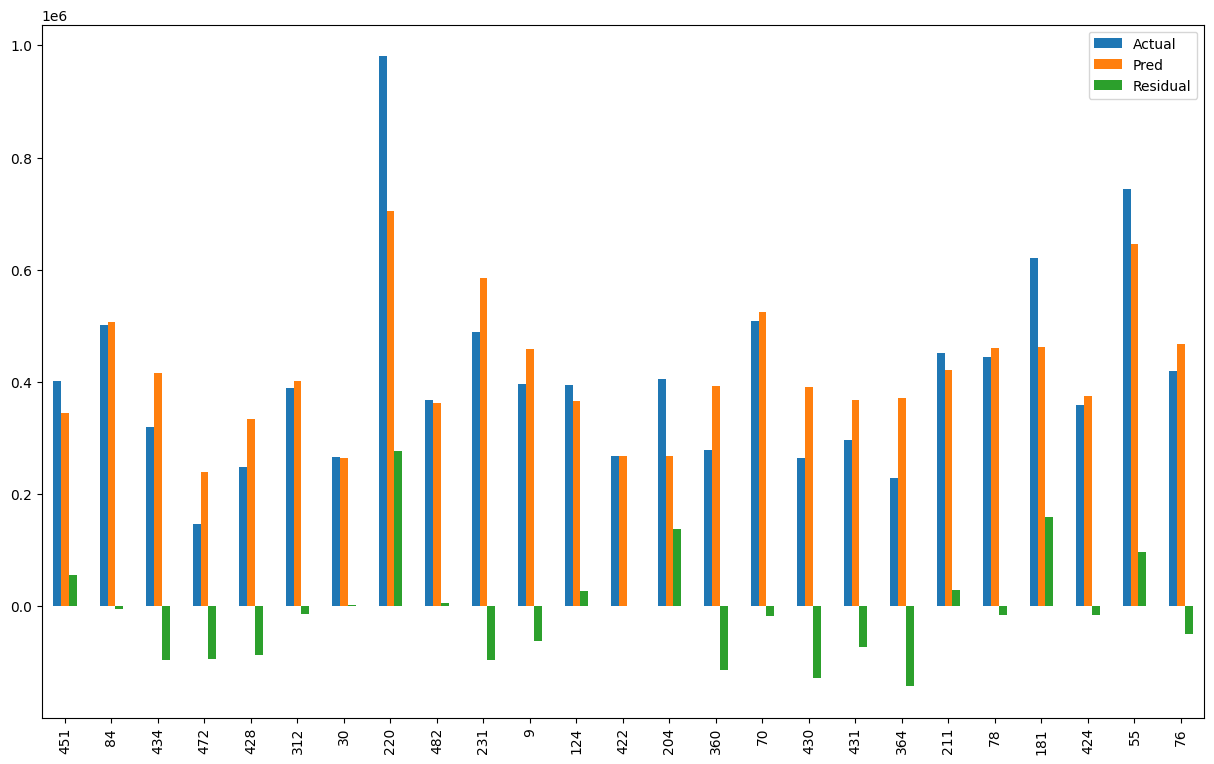

In [43]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("The mean square error is",mse)
    

The mean square error is 7048219280.217693


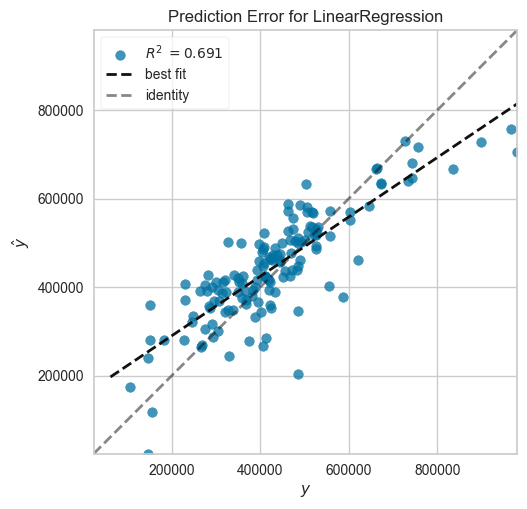

In [50]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();


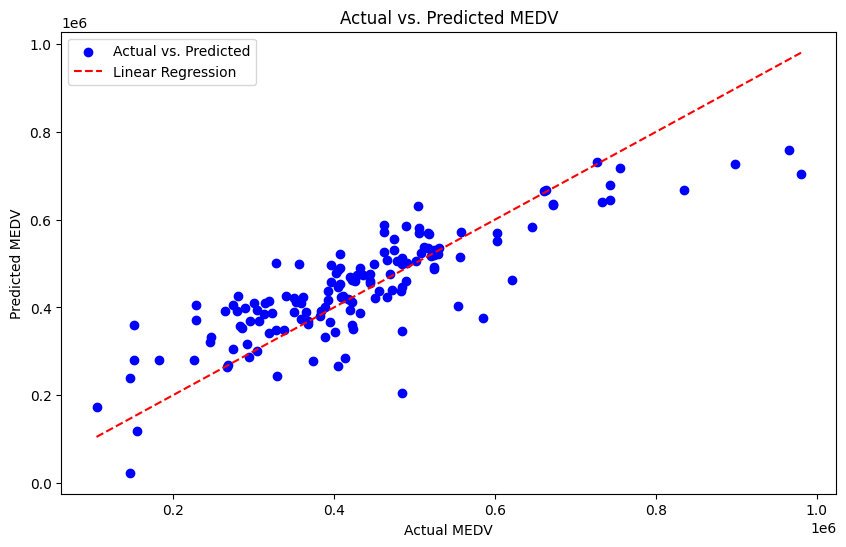

       Actual           Pred      Residual
451  401100.0  344506.487591  56593.512409
84   501900.0  506327.279766  -4427.279766
434  319200.0  415353.170170 -96153.170170
472  147000.0  239962.063880 -92962.063880
428  247800.0  333649.613126 -85849.613126
..        ...            ...           ...
5    602700.0  551229.614629  51470.385371
116  445200.0  475562.294919 -30362.294919
45   405300.0  447067.081751 -41767.081751
16   485100.0  447799.381001  37300.618999
452  422100.0  359373.985563  62726.014437

[147 rows x 3 columns]
The mean squared error is 7048219280.217693


In [48]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Configure plot settings
plt.rcParams["figure.figsize"] = (10, 6)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv(r"C:\Users\Swapnali\Desktop\Boston_housing\housing.csv")

# Train-Test Split
X = df.drop(columns="MEDV")
y = df["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression Modeling
model = LinearRegression()
model.fit(X_train, y_train)

# Scatter plot of actual data points
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')

# Linear regression line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Linear Regression')

plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs. Predicted MEDV')
plt.legend()
plt.show()

# Compare Actual and Predicted Labels
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual": y_test - y_pred}
comparing = pd.DataFrame(my_dict)
print(comparing)
result_sample = comparing.head(25)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("The mean squared error is", mse)
